<a href="https://colab.research.google.com/github/vinicius-mattoso/Time_Series_BOVESPA/blob/main/Time_Series_BOVESPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project for time series study using prophet
---

**STEPS:**

---
 [x] Data collection through yahoo finance;

 [x] Series Plot;

 [x] Autocorrelation evaluation of the series;

 [x] Evaluation of additive or multiplicative modeling;

 [x] Analyze using a frequency of weeks;

 [x] Analyze using a frequency of months;

 [x] Make the forecast for the first half of 2021;

 

---

**OBJECTIVES:**

---
 [x] Collect the data from the exchange;

 [x] Data Analysis;

 [x] Creat a model;

 [x] Learning more about PROPHET;

 [x] Predict the first half of 2021;

 ---

**FUTURE STEPS:**

---
 [ ] Studying algorithm tuning methods;

 [ ] Analyze using a frequency of months;

 [ ] Remove the holidays;

 [ ] External regressors;

 [ ] Predict the year of 2021;

 ---



#### Loading the main libraries and the time series
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas_datareader 
import pandas_datareader.data as web
!pip install yfinance #--upgrade --no-cache-dir
import yfinance as yf

In [2]:
# Instantiating the library to acquire data
yf.pdr_override()

In [3]:
# Loading the database with BOVESPA values, within a specific range
from datetime import date
ticker='^BVSP'
data_start='1994-01-01'
print('First Day')
print(data_start)
data_end=date.today().strftime('%Y-%m-%d') 
print('Last Day')
print(data_end)
ibov = web.get_data_yahoo(ticker, start=data_start, end=data_end)

First Day
1994-01-01
Last Day
2021-01-29
[*********************100%***********************]  1 of 1 completed


#### Time series analysis
---

In [4]:
# Analysing the first 5 lines from the dataset
ibov.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-01-03,375.500000,380.100006,373.399994,380.100006,380.100006,0
1994-01-04,380.100006,400.600006,380.100006,400.600006,400.600006,0
1994-01-05,400.600006,435.700012,400.600006,421.100006,421.100006,0
1994-01-06,421.100006,446.500000,421.100006,444.200012,444.200012,0
1994-01-07,444.200012,476.600006,444.200012,476.399994,476.399994,0


In [5]:
# Analysing the last 5 lines from the dataset
ibov.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-13,123996.0,124032.0,121016.0,122040.0,122040.0,10291500
2021-01-14,121947.0,123896.0,121947.0,123481.0,123481.0,8974400
2021-01-15,123472.0,123472.0,120374.0,120502.0,120502.0,9387600
2021-01-19,121250.0,122120.0,119257.0,120673.0,120673.0,7886000
2021-01-20,120645.0,121449.0,118740.0,119708.0,119708.0,7947300
2021-01-21,119628.0,120243.0,117785.0,118443.0,118443.0,8573900
2021-01-22,118318.0,118318.0,116109.0,117172.0,117172.0,9373100
2021-01-26,117381.0,119167.0,116109.0,116464.0,116464.0,10681400
2021-01-27,116463.0,117840.0,114887.0,115882.0,115882.0,12380400


In [6]:
# Analysing the type of data from the dataset, and looking for null values
ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6692 entries, 1994-01-03 to 2021-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6692 non-null   float64
 1   High       6692 non-null   float64
 2   Low        6692 non-null   float64
 3   Close      6692 non-null   float64
 4   Adj Close  6692 non-null   float64
 5   Volume     6692 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 366.0 KB


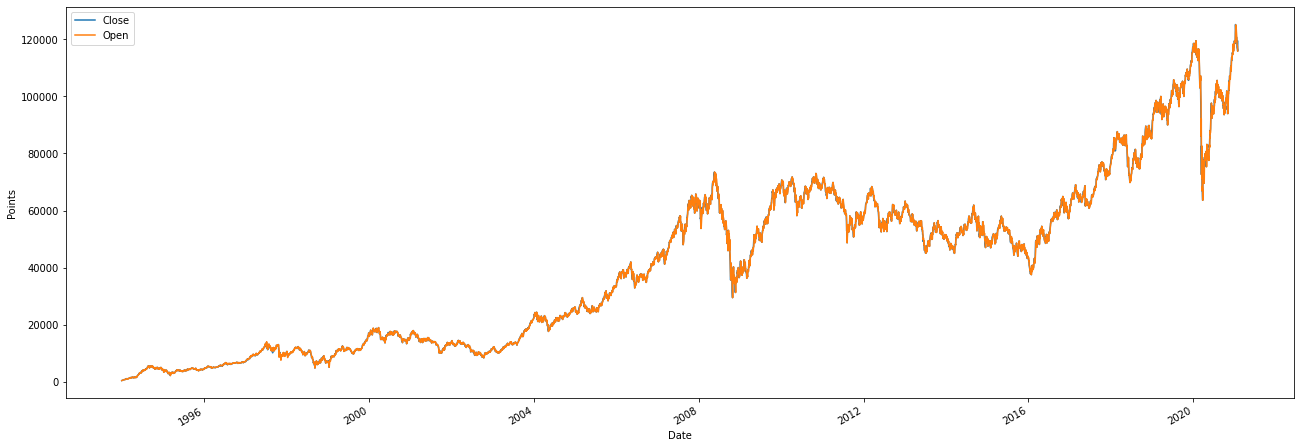

In [7]:
#Ploting the values of Opening and Closing the BOVESPA
ibov[["Close","Open"]].plot(figsize=(22,8),xlabel='Date',ylabel='Points');

As at first we are interested in doing a simple analysis to predict the opening or closing value of the exchange with the prophet, I will remove the data for High, Low, Adj and Volume.

---



In [8]:
ibov_fillter=ibov[["Close","Open"]]

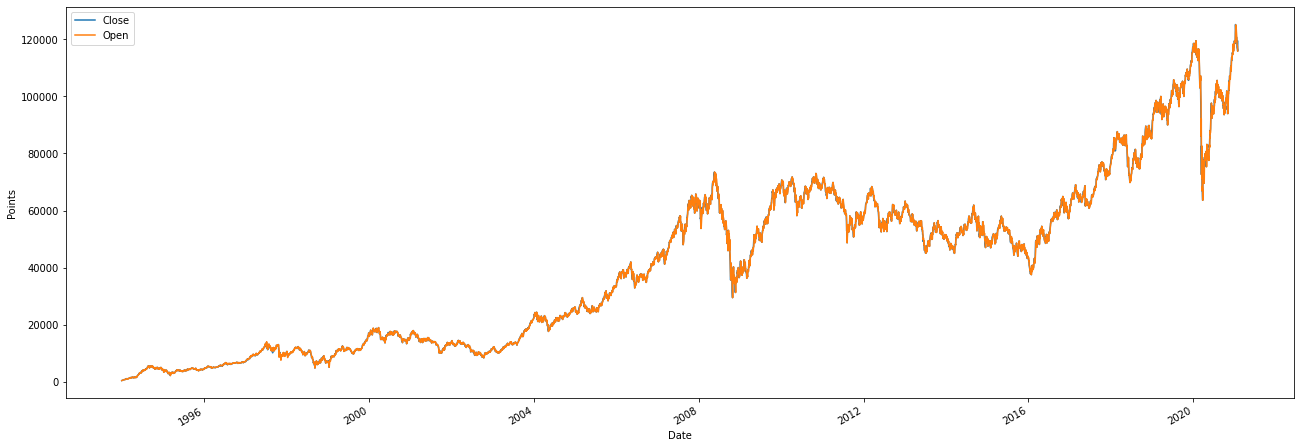

In [9]:
#Ploting the values of Opening and Closing the BOVESPA, from the filltred dataset
ibov_fillter.plot(figsize=(22,8),xlabel='Date',ylabel='Points');

#### Evaluating the autocorrelation
---


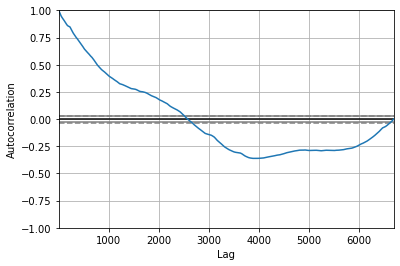

In [10]:
# Loading the librarie
from pandas.plotting import autocorrelation_plot

#Looking the Closing Data
autocorrelation_plot(ibov_fillter['Close'])

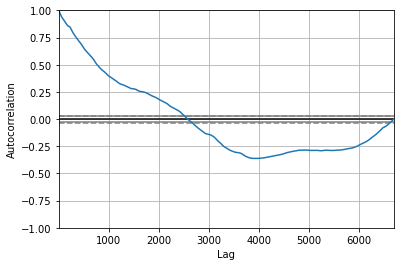

In [11]:
#Looking the Opening Data
autocorrelation_plot(ibov_fillter['Open'])

The correletion plots, graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

The horizontal lines in the plot correspond to 95% and 99% confidence bands.

The dashed line is 99% confidence band.

**Important**

As we can see, both datas has a higher correlation. And just for this inicial studie, I will **consider just the Opening Data** .

In [12]:
#### Autocorrelation with  the StatsModel
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We have two types of plot, that is heavily used to analyse the correlation in time series: 

**Autocorrelation (acf)** and **Partial Autocorrelation (pacf)** plots

**Autocorrelation (acf)**

Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

*For exemple the positive values of correlation, means that if the points increase it still increasing*.


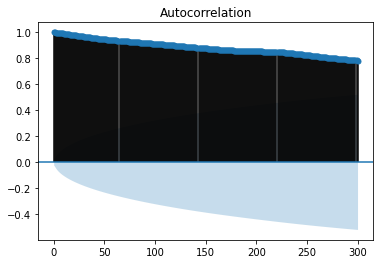

In [13]:
# Autocorrelation plot
plot_acf(ibov_fillter['Open'], lags=300)
pyplot.show()

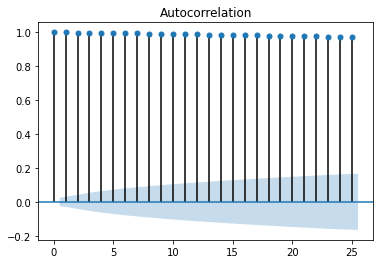

In [14]:
# Zooming to better analyze the correlation
plot_acf(ibov_fillter['Open'], lags=25)
pyplot.show()

**Partial Autocorrelation (pacf)**

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

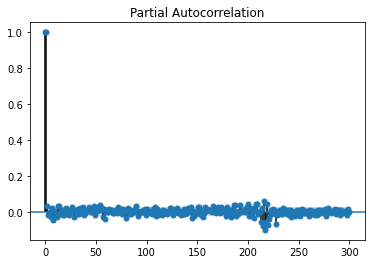

In [15]:
# Partial Autocorrelation plot
plot_pacf(ibov_fillter['Open'], lags=300)
pyplot.show()

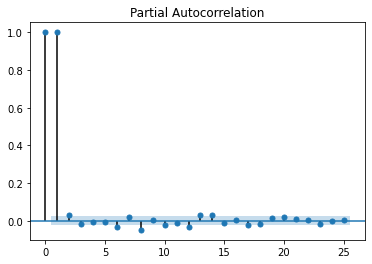

In [16]:
plot_pacf(ibov_fillter['Open'], lags=25)
pyplot.show()

More Explanations cen be found into:

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

https://www.dummies.com/programming/big-data/data-science/autocorrelation-plots-graphical-technique-for-statistical-data/



## Making a week avaliation
---


In [17]:
# Making a resample for a week analysis
resample = ibov_fillter.resample('1W')

In [18]:
type(resample)

pandas.core.resample.DatetimeIndexResampler

In [19]:
points_mean_week = resample.mean()

In [20]:
# Evaluating the null values
points_mean_week.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413 entries, 1994-01-09 to 2021-01-31
Freq: W-SUN
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1413 non-null   float64
 1   Open    1413 non-null   float64
dtypes: float64(2)
memory usage: 33.1 KB


In [21]:
# Obserrving the last 5 terms of the dataset, weekly resemple.
points_mean_week.tail(5)

,Close,Open
Date,,
2021-01-03,119277.333333,118782.000000
2021-01-10,120957.400000,119745.200000
2021-01-17,122565.600000,123549.000000
2021-01-24,118999.000000,119960.250000
2021-01-31,117220.000000,116575.333333


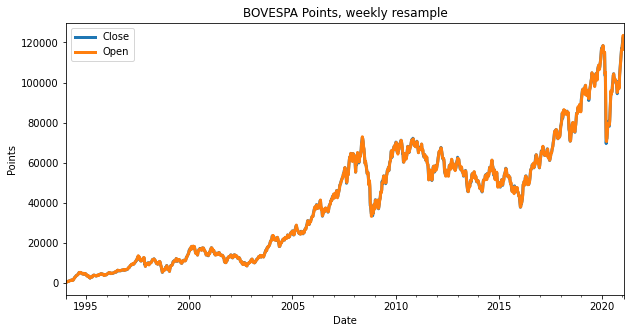

In [22]:
# Plot of the weekly resemple dataset.
points_mean_week.plot(figsize=(10,5), linewidth=3, fontsize=10, title='BOVESPA Points, weekly resample',ylabel='Points')
pyplot.show()

## Creating a baseline considering a forecast with a moving average.

---

In [23]:
# Defines a n-element window
n=7
window = n
# Obtains the first n values of the series
history_open = [points_mean_week['Open'].values[i] for i in range(window)]
history_open

[404.3000061035156,
 514.2600036621094,
 617.3199951171875,
 692.0500030517578,
 775.6400024414063,
 892.7200073242187,
 1038.1500244140625]

In [24]:
# Obtains all values after the first n values.
# range(Window_size, series_size)
test_open = [points_mean_week['Open'].values[i] for i in range(window, len(points_mean_week['Open'].values))]
# Displaying the first 5 values after the window
test_open[0:5]

[997.639990234375, 1040.5600219726562, 1207.9, 1350.3, 1349.6800048828125]

In [25]:
# Printing the first 10 elements of the series to check the previous codes
points_mean_week['Open'].head(10)

Date
1994-01-09     404.300006
1994-01-16     514.260004
1994-01-23     617.319995
1994-01-30     692.050003
1994-02-06     775.640002
1994-02-13     892.720007
1994-02-20    1038.150024
1994-02-27     997.639990
1994-03-06    1040.560022
1994-03-13    1207.900000
Freq: W-SUN, Name: Open, dtype: float64

---

Forecast with Mobile Windows

---

In [26]:
###############################################################################
# Defines a variable called X_open that is the copy of the data series
###############################################################################
X_open = points_mean_week['Open'].values

###############################################################################
# Defines a n-element window
###############################################################################
n=12
window = n
###############################################################################
# Obtains the first n values of the series
###############################################################################
history = [X_open[i] for i in range(window)]

###############################################################################
# Get all values after the first n (window).
###############################################################################
test = [X_open[i] for i in range(window, len(X_open))]

###############################################################################
# Creating a prediction list (precistion_MoveAverageWindows)
###############################################################################
prediction_MAW = []

###############################################################################
# Looping nos dados
###############################################################################
for t in range(len(test)):

  # Defining the length of the series in analysis
  length = len(history)
  
  # Defining the variable predicted_value_mean as the mean of the n current values.
    #range(start, stop, step)                                                        
  predicted_value_mean = np.mean([history[i] for i in range(length - window, length)])        
  
  # Defines the variable real_value with the current value of the test..
  real_value = test[t]                                                              
  
  # Adding the value into the prediction list
  prediction_MAW.append(predicted_value_mean)                                                  
  
  # Update the history list with the next real value..
  history.append(real_value)                                                        
  
  # Print the predicted value and the real value
  print('Valor predito=%f, Valor real=%f' % (predicted_value_mean, real_value))

Valor predito=906.710005, Valor real=1456.400024
Valor predito=994.385006, Valor real=1441.800000
Valor predito=1071.680006, Valor real=1580.959985
Valor predito=1151.983339, Valor real=1368.475006
Valor predito=1208.352089, Valor real=1566.760010
Valor predito=1274.278756, Valor real=1620.840015
Valor predito=1334.955423, Valor real=1532.800024
Valor predito=1376.176257, Valor real=1719.260010
Valor predito=1436.311258, Valor real=2179.940039
Valor predito=1531.259593, Valor real=2442.899963
Valor predito=1634.176257, Valor real=2855.879980
Valor predito=1759.641255, Valor real=3017.659961
Valor predito=1898.639585, Valor real=3202.220020
Valor predito=2044.124584, Valor real=3468.425049
Valor predito=2213.010005, Valor real=3685.379980
Valor predito=2388.378338, Valor real=3967.999951
Valor predito=2605.005417, Valor real=4011.400000
Valor predito=2808.725416, Valor real=4092.639990
Valor predito=3014.708747, Valor real=4282.259961
Valor predito=3243.830409, Valor real=4517.139941
Va

In [27]:
# Calculating the Root Mean Square error
from sklearn.metrics import mean_squared_error
rmse_MAW = np.sqrt(mean_squared_error(test, prediction_MAW))    

In [28]:
# Print the value of the rmse
print('Root Mean Square: %.3f' % rmse_MAW)

Root Mean Square: 4021.689


In [29]:
# Calculating the mean of all Open points
points_mean_all=points_mean_week['Open'].mean()
print(points_mean_all)

40826.80465234541


In [30]:
# Evaluating the percentual erro between the mean of all and the RMSE
percentual_avaliation_MAW=(rmse_MAW/points_mean_all)*100


In [31]:
print('Percentage error between the all point mean and the RMSE : %.3f' % percentual_avaliation_MAW)

Percentage error between the all point mean and the RMSE : 9.851


---

Plot of the real values and the predicted values by the Moving Average Window method.

---

In [32]:
#############################################
# plot the real values and the predicted ones
#############################################
#pyplot.plot(test, label='Real Value') 
#pyplot.legend()
#pyplot.plot(prediction_MAW, color='red', label='Predicted Value')
#pyplot.legend()
#pyplot.xlabel('Data')
#pyplot.show()

In [33]:
# Creating tha variable with the time used into the MAW analysis
time_analysis=[points_mean_week.index[i] for i in range(length - window+1)]
# Observing the first 5 responses
time_analysis[0:5]

[Timestamp('1994-01-09 00:00:00', freq='W-SUN'),
 Timestamp('1994-01-16 00:00:00', freq='W-SUN'),
 Timestamp('1994-01-23 00:00:00', freq='W-SUN'),
 Timestamp('1994-01-30 00:00:00', freq='W-SUN'),
 Timestamp('1994-02-06 00:00:00', freq='W-SUN')]

In [34]:
# Creating a Data Frame with the real and the prediscted values
d={'TIME':time_analysis, 'MAW': prediction_MAW,'Real':test}
MAW_results=pd.DataFrame(data=d)
# Seting Time as index of the df
MAW_results=MAW_results.set_index('TIME')
# Observing the first 5 lines
MAW_results.head(5)

,MAW,Real
TIME,,
1994-01-09,906.710005,1456.400024
1994-01-16,994.385006,1441.800000
1994-01-23,1071.680006,1580.959985
1994-01-30,1151.983339,1368.475006
1994-02-06,1208.352089,1566.760010


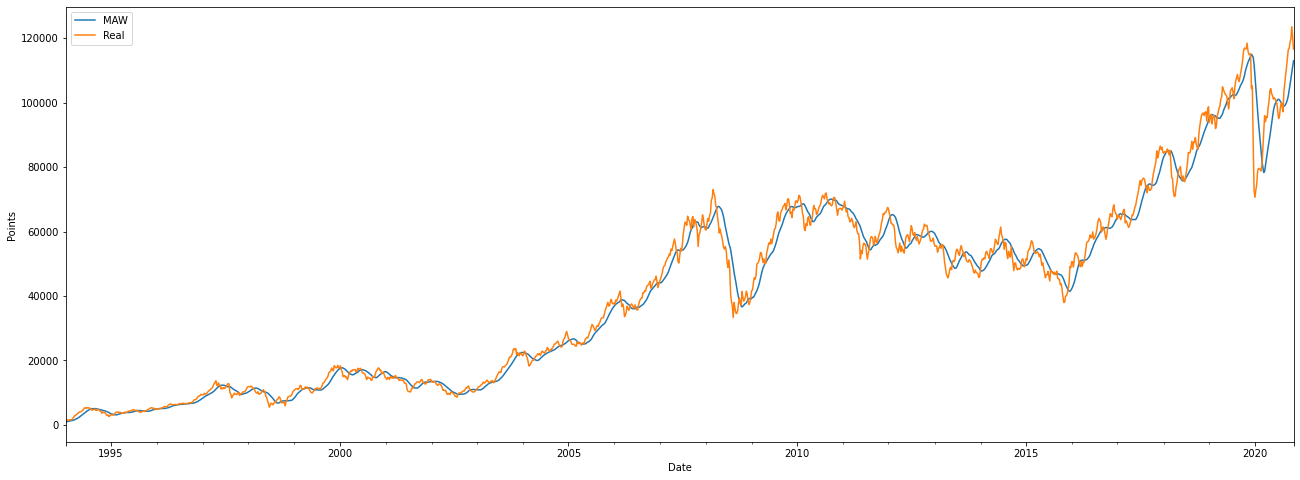

In [35]:
############################################################
# Making the Plot to analysis the response of the MAW method
############################################################

MAW_results.plot(figsize=(22,8),xlabel='Date',ylabel='Points');

## Creating a new model with PROPHET, to try to get a better result than this one with MAW method.

---


Creating Data for making the validation of the model

In [36]:
# Creating a Split point to separate data for future model validation
# 12=3 months (4 weeks per month)
# Use the last 3 months of the data set to made the validation
split_point = len(points_mean_week['Open']) - 12

In [37]:
# Dataset for prophet week analysis, with contains the lines until the split_point
dataset_prophet_1week = points_mean_week['Open'][0:split_point]
#len(dataset_prophet_1week)

In [38]:
# Creating the data for the future validation of the model, it will contains the lest 12 values.
validation_prophet_1week =  points_mean_week['Open'][split_point:]

In [39]:
# Print the size os the variables
print('Dataset %d, Validation %d' % (len(dataset_prophet_1week), len(validation_prophet_1week)))

Dataset 1401, Validation 12


---

Now I will evaluate the trend, noise and the seasonality.This evaluation is the decomposition of the time series.

The decomposition is used to understand better the problem during time series analysis and forecasting.

It can be additive or multiplicative, let's use the statsmodels to making this avaliations.

The additive model is Y[t] = T[t] + S[t] + e[t]

The multiplicative model is Y[t] = T[t] * S[t] * e[t]


---

In [40]:
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
# Making the decomposition considering a additive model
result_addtive = seasonal_decompose(points_mean_week['Open'],  model='additive')

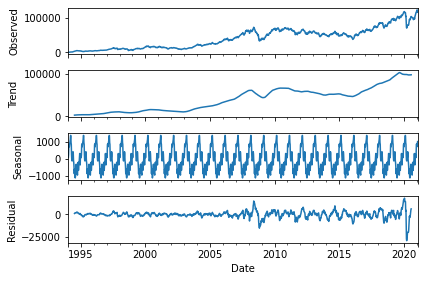

In [42]:
import matplotlib.pyplot as plt
result_addtive.plot()
pyplot.show()

In [43]:
# Making the decomposition considering a multiplicative model
resultado_mult = seasonal_decompose(points_mean_week['Open'],  model='multiplicative')

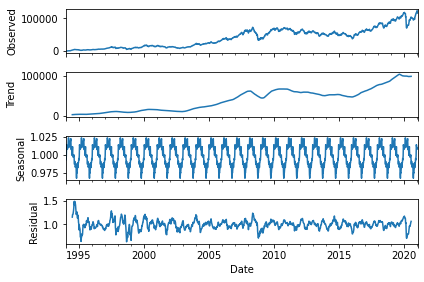

In [44]:
import matplotlib.pyplot as plt
resultado_mult.plot()
pyplot.show()

---

Observing the Residual in both models. I can assume that the multiplicative model better describe the time series, because it has the smallest residual error.

---

In [45]:
# Making the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
test_estacionariedade = adfuller(points_mean_week['Open'])
#test_estacionariedade



In [46]:
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-value','Lags','Number of data used'])
for key, value in test_estacionariedade[4].items():
  output['Valor crítico(%s)' %key] = value


In [47]:
# Printing the Results
print(output)

Teste                     0.103266
p-value                   0.966283
Lags                     17.000000
Number of data used    1395.000000
Valor crítico(1%)        -3.435046
Valor crítico(5%)        -2.863614
Valor crítico(10%)       -2.567874
dtype: float64


**Adfuller test analysis**

---
**Null Hypothesis** (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

**Alternate Hypothesis** (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

**p-value** > 0.05: **Fail to reject** the **null hypothesis** (H0), the data has a unit root and is non-stationary.

**p-value** <= 0.05: **Reject** the **null hypothesis** (H0), the data does not have a unit root and is stationary.

---

https://machinelearningmastery.com/time-series-data-stationary-python/


Analysing the p-value, we can afirme that the time series **fail to reject** the **null hypothesis**, so it is **NON-STATIONARY**. It has a time dependence.

In [48]:
#!pip install fbprophet


Start using the **PROPHET**, with the knowledge acquired from the previous analysis.

In [49]:
# Loading the librarie
from fbprophet import Prophet

In [50]:
# Creating a dataframe with the time data and the "open" values

dataframe_1week = pd.DataFrame({'ds': dataset_prophet_1week.index, 'y': dataset_prophet_1week.values})
len(dataframe_1week)

1401

In [51]:
# Observing the result of the dataframe generation
dataframe_1week.tail()

,ds,y
1396,2020-10-11,95836.00
1397,2020-10-18,98591.75
1398,2020-10-25,99997.20
1399,2020-11-01,98764.40
1400,2020-11-08,97146.00


In [52]:
#Creating a multiplicative model
model = Prophet(seasonality_mode='multiplicative')

In [53]:
# Training the model with the dataframe
model.fit(dataframe_1week)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
# Creating future data considering the trained model
# periods=N
# Freq= Week, Year, Month
N=34
future_1week = model.make_future_dataframe(periods =N, freq='W')
len(future_1week)

1435

In [55]:
future_1week.tail(N+1)
# we can see that the first element of this list is the last element from our dataset

,ds
1400,2020-11-08
1401,2020-11-15
1402,2020-11-22
1403,2020-11-29
1404,2020-12-06
1405,2020-12-13
1406,2020-12-20
1407,2020-12-27
1408,2021-01-03
1409,2021-01-10


In [56]:
# forecasting the values
forecast_1week = model.predict(future_1week)

In [57]:
# Printing the last 3 values
forecast_1week.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
1432,2021-06-20,114099.066629,104562.792435,118228.076629,113788.625443,114485.151491,-0.023199,-0.023199,-0.023199,-0.023199,-0.023199,-0.023199,0.0,0.0,0.0,111452.126764
1433,2021-06-27,114313.277222,103780.409490,118788.949615,113967.008706,114719.306703,-0.027651,-0.027651,-0.027651,-0.027651,-0.027651,-0.027651,0.0,0.0,0.0,111152.412390
1434,2021-07-04,114527.487815,103594.086835,118174.910907,114159.358733,114960.166018,-0.029613,-0.029613,-0.029613,-0.029613,-0.029613,-0.029613,0.0,0.0,0.0,111135.992617


In [58]:
# Printing the last N+1 values
forecast_1week[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(N+1)

,ds,yhat,yhat_lower,yhat_upper
1400,2020-11-08,107951.801618,101436.645640,115703.228646
1401,2020-11-15,108218.160949,100670.505144,116209.106886
1402,2020-11-22,108635.147777,101075.068545,115613.981596
1403,2020-11-29,109152.668531,101724.000348,116411.520847
1404,2020-12-06,109535.947337,102185.655229,116900.473902
1405,2020-12-13,109684.896264,102900.600018,116456.632035
1406,2020-12-20,109863.783106,102487.162847,117283.163248
1407,2020-12-27,110514.706716,102812.235746,118356.779735
1408,2021-01-03,111770.787058,104570.714735,119584.323662
1409,2021-01-10,113186.500316,105759.757747,120217.365425


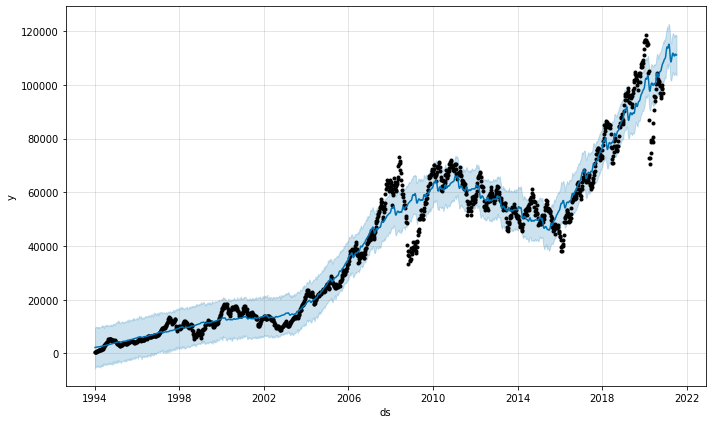

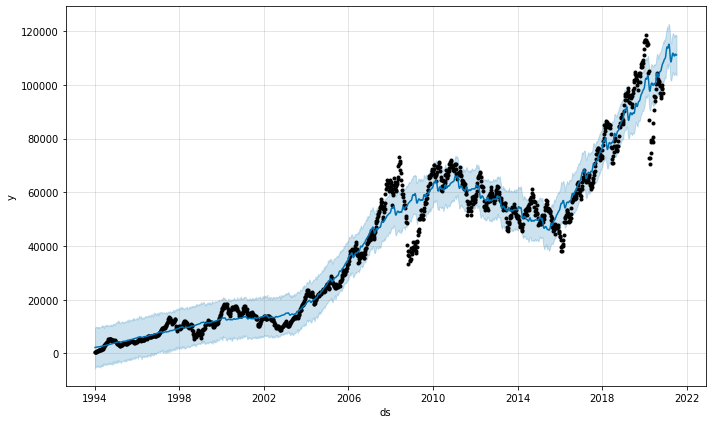

In [59]:
# Ploting the forecast values passing the forecast dataframe.
model.plot(forecast_1week)

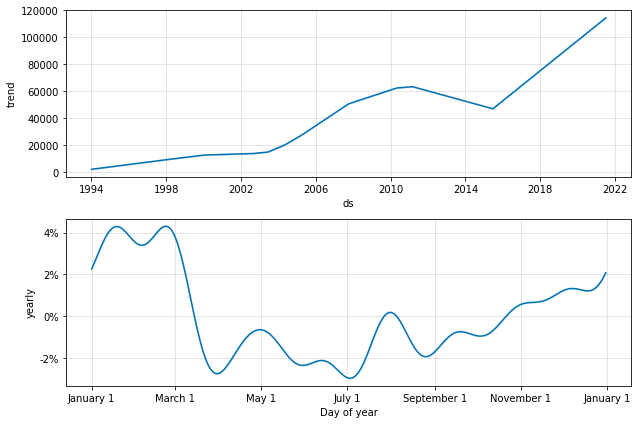

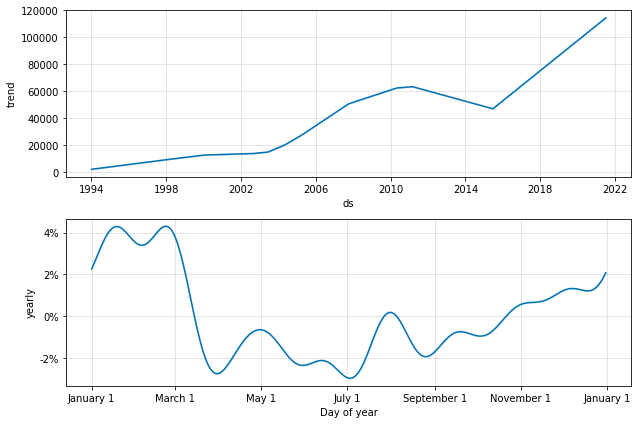

In [60]:
# Ploting the forecast components.
# By default you'll see the trend, yearly seasonality, and weekly seasonality of the time series. 
# If you include holidays, you'll see those here, too
model.plot_components(forecast_1week)

In [61]:
# making a interative plot with the values and the forecast
from fbprophet.plot import plot_plotly, plot_components_plotly


plot_plotly(model, forecast_1week)

In [62]:
# Result avaliation
from sklearn.metrics import mean_squared_error
from math import sqrt
predicted_model=forecast_1week.yhat[0:split_point]
rmse = sqrt(mean_squared_error(dataframe_1week.y, predicted_model))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5676.603


In [63]:
# Making a interative plor into the components
#plot_components_plotly(model, forecast_1week)

---

In order to make a **validation of the model**, I will use the part of the data set, that was **previously split**.

---

In [64]:
validation_prophet_1week.head(N+1)

Date
2020-11-15    103371.200000
2020-11-22    106130.500000
2020-11-29    108715.200000
2020-12-06    111013.000000
2020-12-13    113854.000000
2020-12-20    116431.600000
2020-12-27    116827.333333
2021-01-03    118782.000000
2021-01-10    119745.200000
2021-01-17    123549.000000
2021-01-24    119960.250000
2021-01-31    116575.333333
Freq: W-SUN, Name: Open, dtype: float64

In [65]:
# dataset validation
validation_df_1week = pd.DataFrame({'ds': validation_prophet_1week.index, 'y': validation_prophet_1week.values})

In [66]:
# data estimating
forecast_prediction_1week = model.predict(validation_df_1week)
forecast_prediction_1week[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(N+1)

,ds,yhat,yhat_lower,yhat_upper
0,2020-11-15,108218.160949,100732.124468,115483.205565
1,2020-11-22,108635.147777,101637.269734,116216.989297
2,2020-11-29,109152.668531,101978.801212,115788.453649
3,2020-12-06,109535.947337,102381.397530,116515.456900
4,2020-12-13,109684.896264,102820.316632,117355.021972
5,2020-12-20,109863.783106,103019.237122,117733.869102
6,2020-12-27,110514.706716,103258.960748,117719.778820
7,2021-01-03,111770.787058,104684.822845,119324.039640
8,2021-01-10,113186.500316,106227.614333,120866.488360
9,2021-01-17,114059.954232,106235.222195,121664.720834


In [67]:
# Creating a dataframe with the results for validation
model_1week_df=pd.DataFrame({'ds': forecast_prediction_1week['ds'],
                             'Real': validation_prophet_1week.values,
                             'Forecast':forecast_prediction_1week['yhat'],
                             'Forecast_up':forecast_prediction_1week['yhat_upper'],
                             'Forecast_down':forecast_prediction_1week['yhat_lower']})
model_1week_df=model_1week_df.set_index('ds');
model_1week_df.head(N+1)

,Real,Forecast,Forecast_up,Forecast_down
ds,,,,
2020-11-15,103371.200000,108218.160949,115483.205565,100732.124468
2020-11-22,106130.500000,108635.147777,116216.989297,101637.269734
2020-11-29,108715.200000,109152.668531,115788.453649,101978.801212
2020-12-06,111013.000000,109535.947337,116515.456900,102381.397530
2020-12-13,113854.000000,109684.896264,117355.021972,102820.316632
2020-12-20,116431.600000,109863.783106,117733.869102,103019.237122
2020-12-27,116827.333333,110514.706716,117719.778820,103258.960748
2021-01-03,118782.000000,111770.787058,119324.039640,104684.822845
2021-01-10,119745.200000,113186.500316,120866.488360,106227.614333


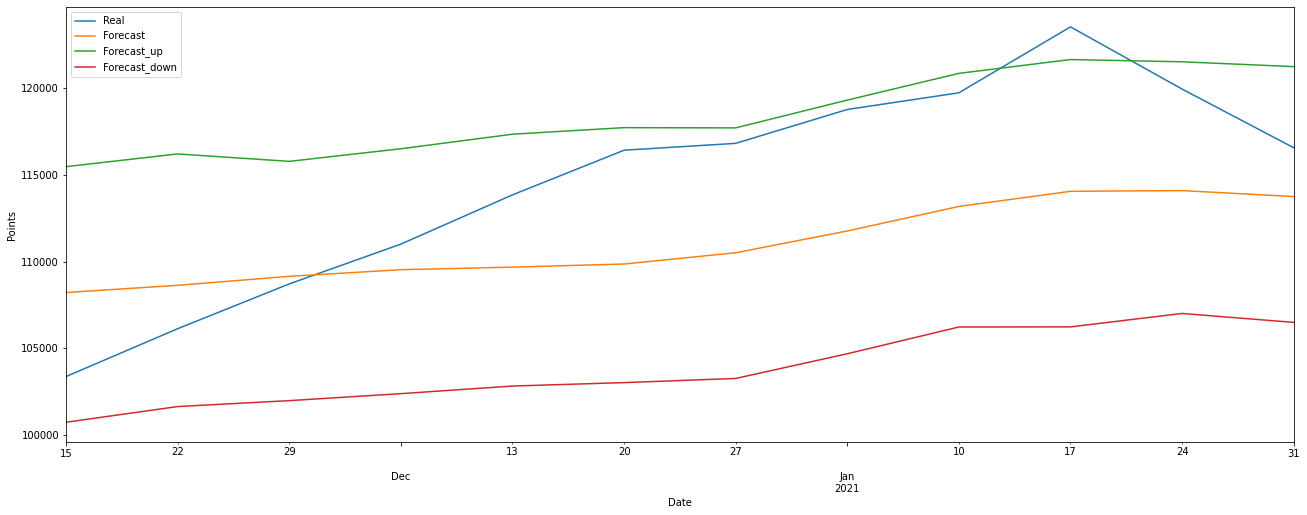

In [68]:
# Ploting the validation result
#model_1week_df[['Real','Forecast','Forecast_up','Forecast_down']].plot(figsize=(22,8),xlabel='Date',ylabel='Points');
model_1week_df.plot(figsize=(22,8),xlabel='Date',ylabel='Points');

---

**We can se that the model is not making a good fitting with the values, but in the boundary limits contains the most part of the data**

---

In [69]:
# Result avaliation
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(model_1week_df['Real'], model_1week_df['Forecast']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5454.340


## Now, in order to try to upgrade the model, I will make the analysis considering a month frequence.

---

In [70]:
# Making a month resample
resample = ibov_fillter.resample('1M')
points_mean_month = resample.mean()

In [71]:
points_mean_month.head()

,Close,Open
Date,,
1994-01-31,575.095001,556.840002
1994-02-28,943.452945,925.023531
1994-03-31,1298.400008,1277.413646
1994-04-30,1506.010524,1495.868421
1994-05-31,1854.586376,1820.095470


In [72]:
points_mean_month.tail()

,Close,Open
Date,,
2020-09-30,98576.142857,98804.857143
2020-10-31,97942.000000,97973.047619
2020-11-30,105215.842105,104428.210526
2020-12-31,115647.000000,115136.150000
2021-01-31,120310.058824,120355.176471


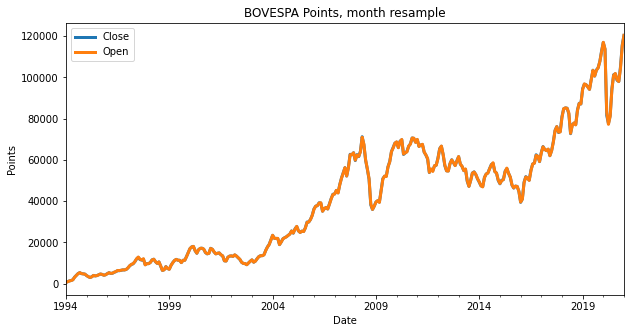

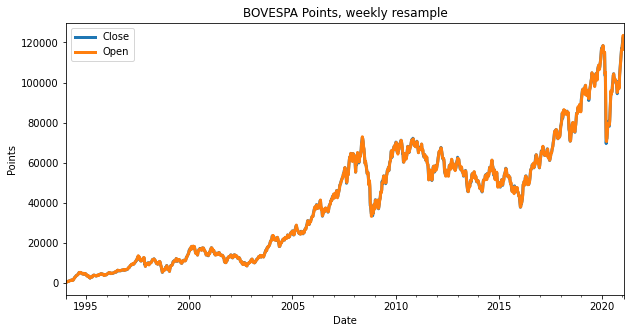

In [73]:
points_mean_month.plot(figsize=(10,5), linewidth=3, fontsize=10, title='BOVESPA Points, month resample',ylabel='Points');
points_mean_week.plot(figsize=(10,5), linewidth=3, fontsize=10, title='BOVESPA Points, weekly resample',ylabel='Points')
pyplot.show()

---

We can observe that when we make a monthly resample, we observe that the **oscillation reduced**.

---

In [74]:
# Making a new split point, because the frequency of point was, changed.
# In order to making a future prediction for 3 months, N=3.
n_month=3
split_point = len( points_mean_month['Open']) - n_month

In [75]:
# Creating the dataset for the monthly analysis
dataset_1month = points_mean_month['Open'][0:split_point]

In [76]:
# Creating the validation dataset for the monthly analysis
validation_1month =  points_mean_month['Open'][split_point:]

In [77]:
# imprime o tamanho dos conjuntos
print('Dataset %d, Validation %d' % (len(dataset_1month), len(validation_1month)))

Dataset 322, Validation 3


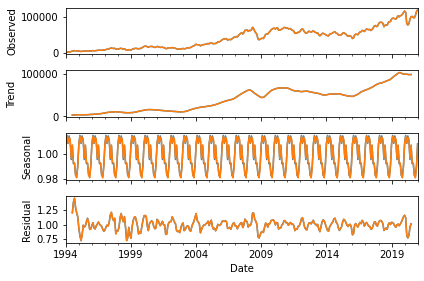

In [78]:
result_multi = seasonal_decompose(points_mean_month,  model='multiplicative')
result_multi.plot()
pyplot.show()

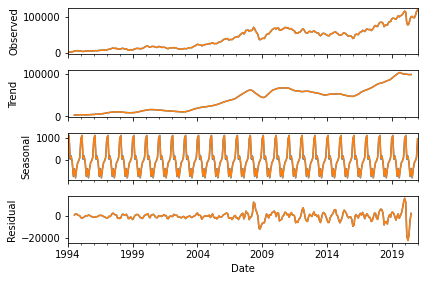

In [79]:
result_add = seasonal_decompose(points_mean_month,  model='additive')
result_add.plot()
pyplot.show()

---
 Both models present the **same residual**, sow I will start with the multiplicative because, I use this model into the last analysis.

 ---

In [80]:

dataframe_1month = pd.DataFrame({'ds':dataset_1month.index, 'y': dataset_1month.values})

In [81]:
#Creating a multiplciative model
model_month = Prophet(seasonality_mode='multiplicative')

In [82]:
#training the model
model_month.fit(dataframe_1month)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
# Gerando dados futuros
# periods=12 periodos para frente
# Freq= Week, Year, Month
future_1month = model_month.make_future_dataframe(periods = 8,
                                                  freq='MS')

In [84]:
future_1month.tail(7)

,ds
323,2020-12-01
324,2021-01-01
325,2021-02-01
326,2021-03-01
327,2021-04-01
328,2021-05-01
329,2021-06-01


In [85]:
# Forecast future values
forecast_1month = model_month.predict(future_1month)

In [86]:
# making a interative plot with the values and the forecast
from fbprophet.plot import plot_plotly, plot_components_plotly


plot_plotly(model_month, forecast_1month)

In [87]:
# Result avaliation
from sklearn.metrics import mean_squared_error
from math import sqrt
predicted_model=forecast_1month.yhat[0:split_point]
rmse = sqrt(mean_squared_error(dataframe_1month.y, predicted_model))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6095.671


In [88]:
# Creating the dataset for the validation
validation_df_1month = pd.DataFrame({'ds': validation_1month.index, 'y': validation_1month.values})

In [89]:
# Predicting the values for the validation
forecast_prediction_1month = model_month.predict(validation_df_1month)
forecast_prediction_1month[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(N+1)

,ds,yhat,yhat_lower,yhat_upper
0,2020-11-30,99026.005277,91369.207721,107259.387087
1,2020-12-31,102199.979172,94722.584968,110106.644296
2,2021-01-31,114125.066721,106078.928404,123044.589386


In [90]:
# Creating a dataframe with the results for validation
model_1month_df=pd.DataFrame({'ds': forecast_prediction_1month['ds'],
                             'Real': validation_1month.values,
                             'Forecast':forecast_prediction_1month['yhat'],
                             'Forecast_up':forecast_prediction_1month['yhat_upper'],
                             'Forecast_down':forecast_prediction_1month['yhat_lower']})
model_1month_df=model_1month_df.set_index('ds');
model_1month_df.head(N+1)

,Real,Forecast,Forecast_up,Forecast_down
ds,,,,
2020-11-30,104428.210526,99026.005277,107259.387087,91369.207721
2020-12-31,115136.150000,102199.979172,110106.644296,94722.584968
2021-01-31,120355.176471,114125.066721,123044.589386,106078.928404


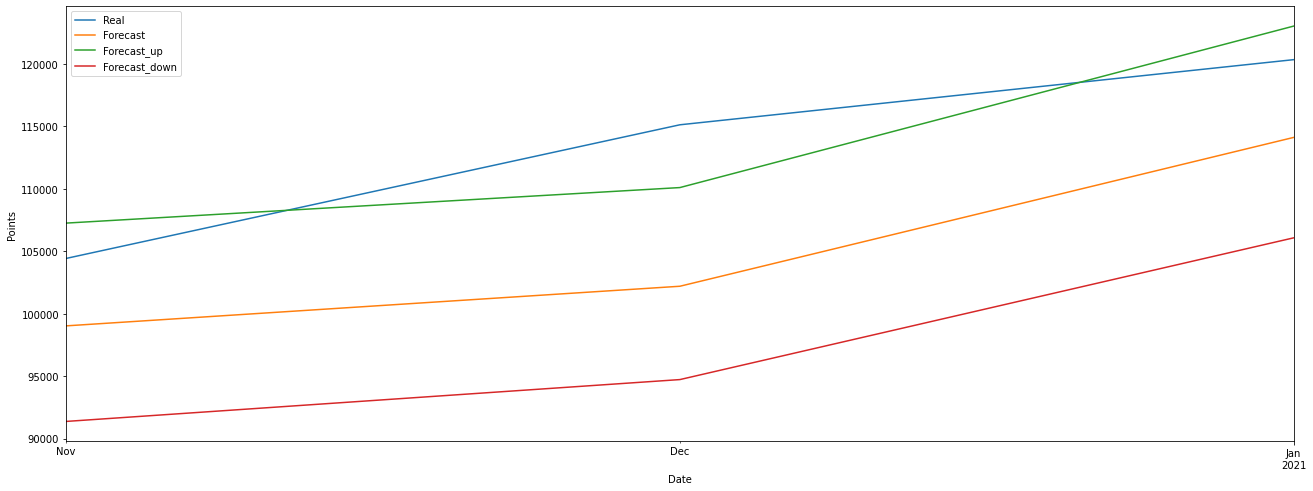

In [91]:
# Ploting the validation result
#model_1week_df[['Real','Forecast','Forecast_up','Forecast_down']].plot(figsize=(22,8),xlabel='Date',ylabel='Points');
model_1month_df.plot(figsize=(22,8),xlabel='Date',ylabel='Points');